In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Loading the MNIST dataset handwritten data 0 to 9
#image classification not suitable but can be used
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [ ]:
# Normalize the pixel values between 0 and 1 (grayscale channel as 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Define the ANN Model Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array (one neuron)
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [ ]:
# Compile the Model #define the loss define the optimizer
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9280 - val_loss: 0.1465 - val_accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1132 - accuracy: 0.9667 - val_loss: 0.0992 - val_accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0838 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0828 - val_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0740 - val_accuracy: 0.9766


In [ ]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 705us/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix #10x10 as 10 
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 958    1    1    1    1    3    5    1    2    7]
 [   0 1124    2    0    0    1    2    0    6    0]
 [   2    3  998    7    3    1    4    6    7    1]
 [   0    0    3  993    0    2    0    4    1    7]
 [   1    1    3    1  967    0    3    1    0    5]
 [   2    0    0    9    2  873    3    0    2    1]
 [   1    3    0    1    5    7  937    0    4    0]
 [   1    6    6    2    6    0    0  994    1   12]
 [   1    0    3    7    6    6    1    4  939    7]
 [   0    3    0    6    7    5    2    2    1  983]]
Accuracy : 0.9766


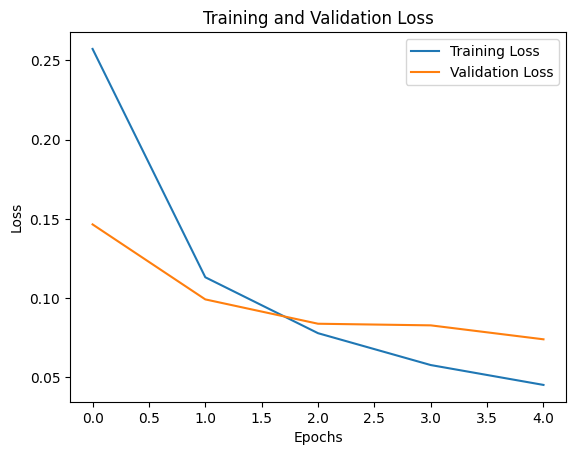

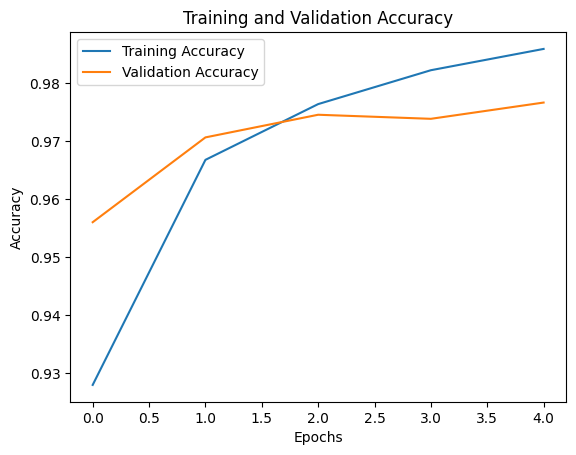

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()